Summary of What These Codes Do:

These Codes perform an end-to-end logistic regression analysis on a heart disease dataset. It includes:

- Data loading and inspection

- Visualization of class distribution

- Data cleaning

- Feature scaling

- Logistic regression modeling

- Coefficient interpretation

- Model evaluation (accuracy, confusion matrix, ROC & PR curves)

- Visualization of how a single feature ("age") affects heart disease probability




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<ipython-input-10-6082c67cb9b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='target', palette='viridis')


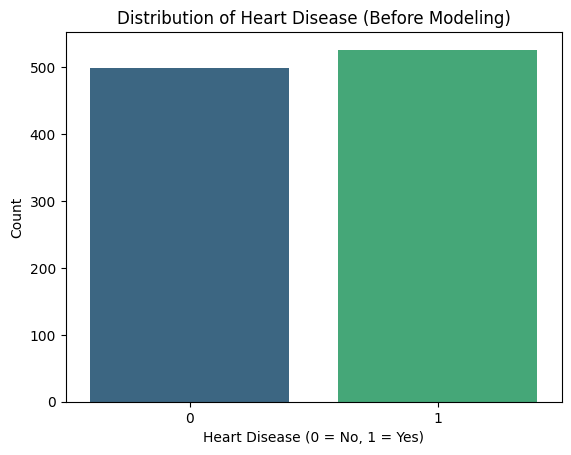

In [ ]:
sns.countplot(data=data, x='target', palette='viridis')
plt.title('Distribution of Heart Disease (Before Modeling)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.dropna()
x = data.drop(columns="target", axis=1)
y = data["target"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

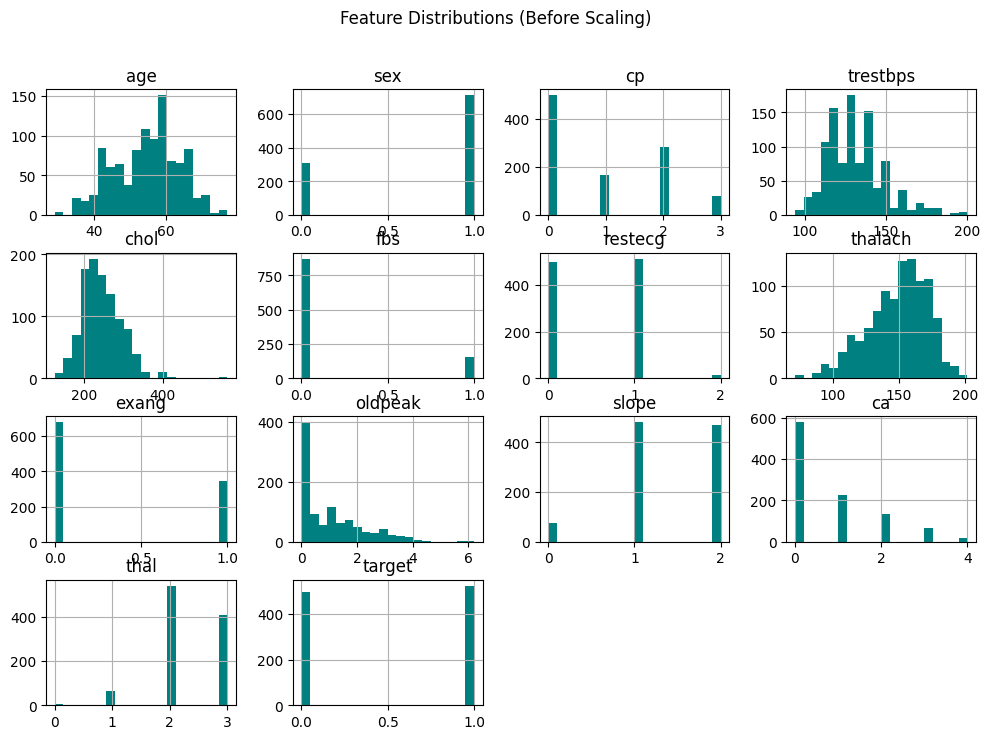

In [ ]:
# Histogram of numerical features before scaling
data.hist(figsize=(12, 8), bins=20, color='teal')
plt.suptitle('Feature Distributions (Before Scaling)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

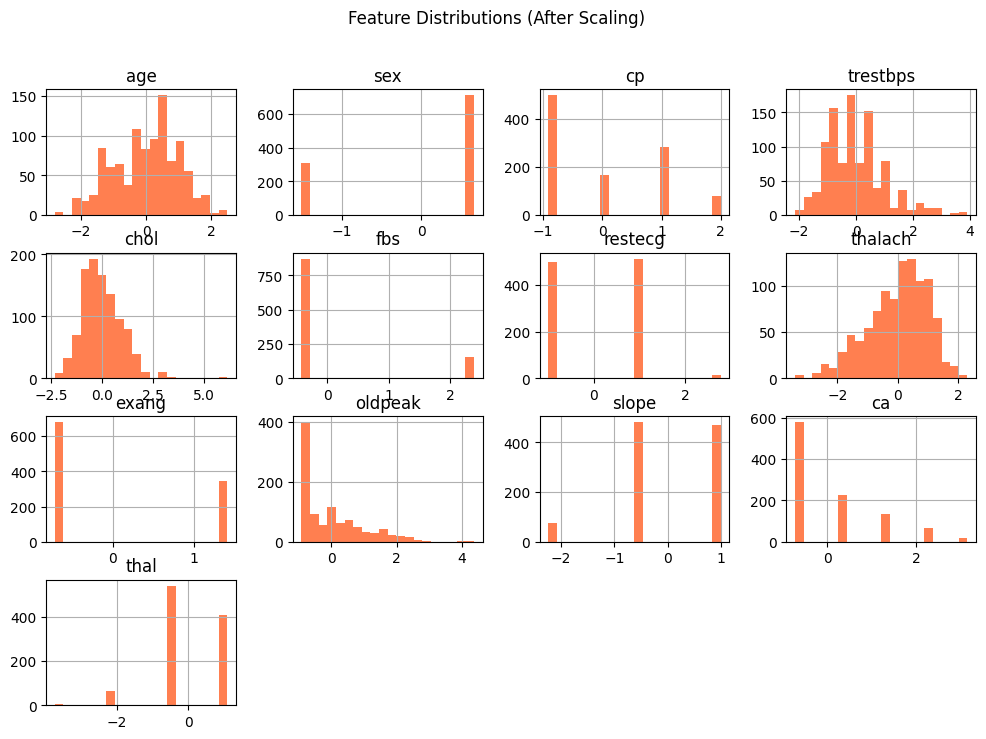

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns='target'))

# Convert scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])

# Plot histograms of scaled features
scaled_df.hist(figsize=(12, 8), bins=20, color='coral')
plt.suptitle('Feature Distributions (After Scaling)')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
coefficents = model.coef_

feature_names = x.columns

for feature, coef in zip(feature_names, coefficents[0]):
  print(f"{feature}: {coef}, Coefficient (log-odds): {coef}")

age: -0.024050601002641614, Coefficient (log-odds): -0.024050601002641614
sex: -0.8555809566740191, Coefficient (log-odds): -0.8555809566740191
cp: 0.7914592158814383, Coefficient (log-odds): 0.7914592158814383
trestbps: -0.28509966247576385, Coefficient (log-odds): -0.28509966247576385
chol: -0.3020156739217155, Coefficient (log-odds): -0.3020156739217155
fbs: -0.03500394620201418, Coefficient (log-odds): -0.03500394620201418
restecg: 0.2049375465842552, Coefficient (log-odds): 0.2049375465842552
thalach: 0.6225736141881997, Coefficient (log-odds): 0.6225736141881997
exang: -0.4571620662222952, Coefficient (log-odds): -0.4571620662222952
oldpeak: -0.619786894714646, Coefficient (log-odds): -0.619786894714646
slope: 0.2667599568161824, Coefficient (log-odds): 0.2667599568161824
ca: -0.7116766586358982, Coefficient (log-odds): -0.7116766586358982
thal: -0.4927774453232217, Coefficient (log-odds): -0.4927774453232217


In [ ]:
import numpy as np

odds_ratios = np.exp(coefficents)
for feature, odds_ratio in zip(feature_names, odds_ratios[0]):
    print(f"Feature: {feature}, Odds Ratio: {odds_ratio}")


Feature: age, Odds Ratio: 0.9762363099719807
Feature: sex, Odds Ratio: 0.42503619172897517
Feature: cp, Odds Ratio: 2.206614004313799
Feature: trestbps, Odds Ratio: 0.7519393104515952
Feature: chol, Odds Ratio: 0.7393264766533982
Feature: fbs, Odds Ratio: 0.9656016057910464
Feature: restecg, Odds Ratio: 1.2274484042238458
Feature: thalach, Odds Ratio: 1.8637183670100281
Feature: exang, Odds Ratio: 0.6330777312319517
Feature: oldpeak, Odds Ratio: 0.5380590886134878
Feature: slope, Odds Ratio: 1.3057269778482141
Feature: ca, Odds Ratio: 0.49082056863664114
Feature: thal, Odds Ratio: 0.6109272186468966


<ipython-input-19-5dfac99fda19>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Feature', y='Log-Odds', palette='coolwarm')


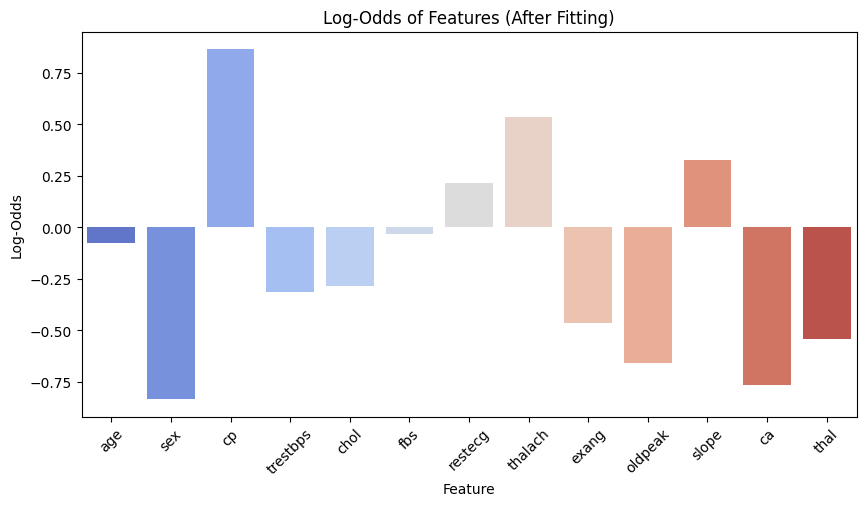

<ipython-input-19-5dfac99fda19>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Feature', y='Odds Ratio', palette='magma')


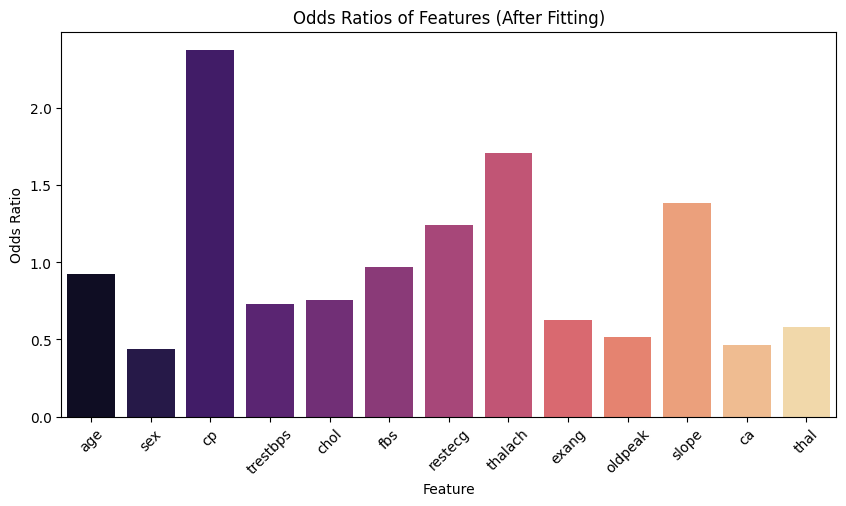

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fit the logistic regression model
X = scaled_df
y = data['target']
model = LogisticRegression()
model.fit(X, y)

# Extract coefficients and calculate odds ratios
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': X.columns, 'Log-Odds': coefficients, 'Odds Ratio': odds_ratios})

# Bar plot for log-odds
plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df, x='Feature', y='Log-Odds', palette='coolwarm')
plt.title('Log-Odds of Features (After Fitting)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df, x='Feature', y='Odds Ratio', palette='magma')
plt.title('Odds Ratios of Features (After Fitting)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix (True Positives, False Positives, False Negatives, True Negatives)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 87.80%
Confusion Matrix:
[[84 19]
 [ 6 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       103
           1       0.83      0.94      0.88       102

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


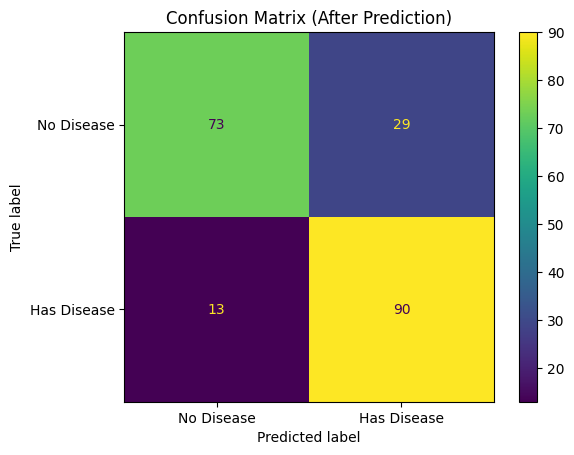

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model again to training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Disease', 'Has Disease'])
plt.title('Confusion Matrix (After Prediction)')
plt.show()


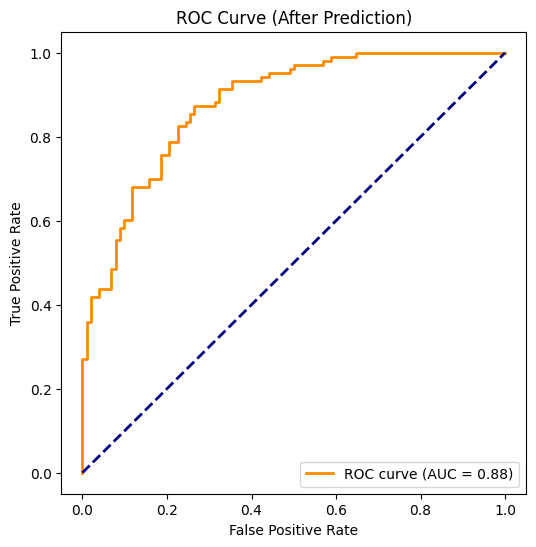

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After Prediction)')
plt.legend(loc='lower right')
plt.show()


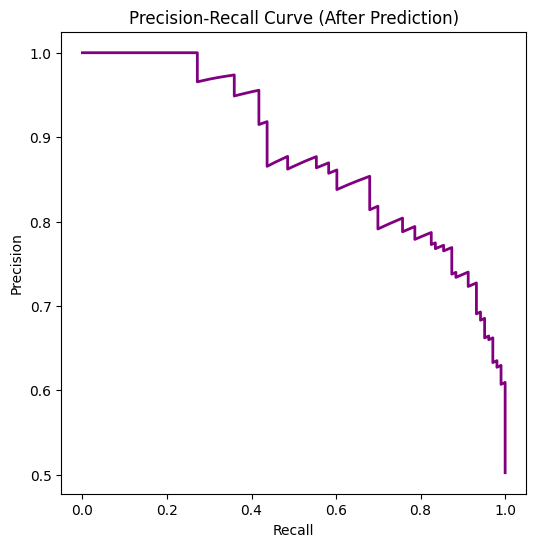

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (After Prediction)')
plt.show()


In [ ]:
# Select a single feature for visualization
X_simple = X[['age']]
y_simple = y

# Fit the logistic regression model
model_simple = LogisticRegression()
model_simple.fit(X_simple, y_simple)


LogisticRegression()

In [ ]:
import numpy as np

# Generate a range of age values for plotting
age_range = np.linspace(X_simple.min(), X_simple.max(), 300).reshape(-1, 1)

# Predict the probability of heart disease for this age range
probabilities = model_simple.predict_proba(age_range)[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


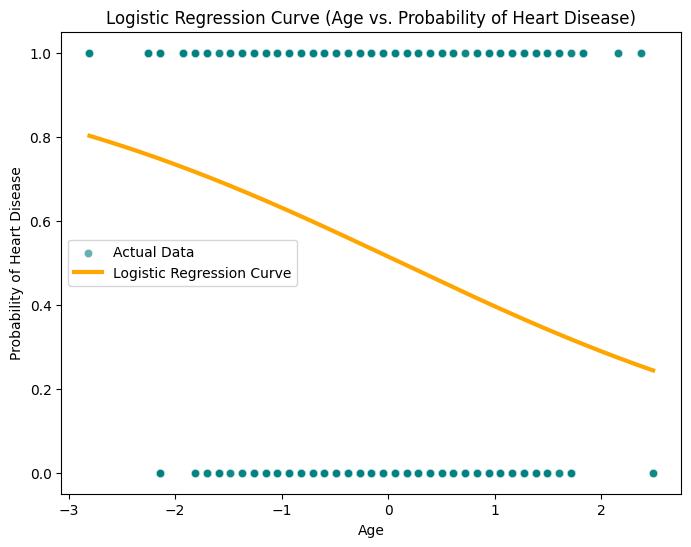

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the actual data points
sns.scatterplot(x=X_simple['age'], y=y_simple, alpha=0.6, label='Actual Data', color='teal')

# Plot the logistic regression curve (sigmoid)
plt.plot(age_range, probabilities, color='orange', linewidth=3, label='Logistic Regression Curve')

# Add labels and title
plt.title('Logistic Regression Curve (Age vs. Probability of Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.legend()
plt.show()